In [1]:
%load_ext autoreload
%autoreload
import cv2
import matplotlib.pyplot as plt
path = "testrom.png"

In [2]:
pic = cv2.imread(path, 0)

In [3]:
pic = (pic - 255) % 255

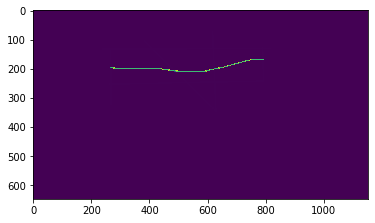

In [4]:
plt.imshow(pic)

In [5]:
import numpy as np

In [6]:
A = np.array([[0, 1,0], [1, 4,1],[0,1,0]])
b = np.array([[0, 0], [0, 0]])

In [7]:
import scipy

In [8]:
arr = np.ones((1000,1000))

In [9]:
lap = [[0.25, 0.5, 0.25],[0.5,-3,0.5],[0.25,0.5,0.25]]

In [10]:
from scipy import signal

In [11]:
test_conv = signal.convolve(arr, lap)

In [12]:
test_conv.shape

(1002, 1002)

In [13]:
B = np.ones_like(test_conv)

In [14]:
B[623:633, 193:203] = 100

In [15]:
sol = np.linalg.solve(test_conv, B)

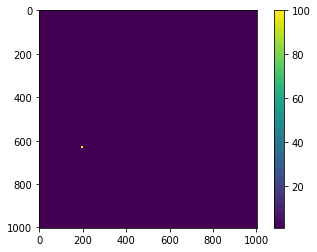

In [16]:
plt.imshow(B)
plt.colorbar()

In [17]:
# fig = plt.figure(figsize=(16, 16))
# p = plt.imshow(test_conv)

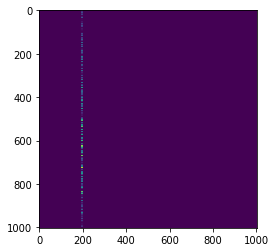

In [18]:
plt.imshow(np.abs(sol))

In [19]:
np.abs(sol)

array([[2.16063850e+13, 2.16063850e+13, 2.16063850e+13, ...,
        2.16063850e+13, 2.16063850e+13, 2.16063850e+13],
       [1.62837043e+13, 1.62837043e+13, 1.62837043e+13, ...,
        1.62837043e+13, 1.62837043e+13, 1.62837043e+13],
       [1.23689508e+14, 1.23689508e+14, 1.23689508e+14, ...,
        1.23689508e+14, 1.23689508e+14, 1.23689508e+14],
       ...,
       [6.10596825e+13, 6.10596825e+13, 6.10596825e+13, ...,
        6.10596825e+13, 6.10596825e+13, 6.10596825e+13],
       [7.03209094e+12, 7.03209094e+12, 7.03209094e+12, ...,
        7.03209094e+12, 7.03209094e+12, 7.03209094e+12],
       [1.70941027e+12, 1.70941027e+12, 1.70941027e+12, ...,
        1.70941027e+12, 1.70941027e+12, 1.70941027e+12]])

In [20]:
b.shape

(2, 2)

# Teste scorefunksjoner

In [22]:
from score import *
%autoreload

In [23]:
N = 4000
g = create_gaussian(N)
m = np.mean(g)

In [24]:
p = (np.random.randint(0,N-1), np.random.randint(0,N-1))

In [26]:
%time ws = basic_score(g,)
%time ss = step_score(g,m)
ws, ss

TypeError: not enough arguments: expected 3, got 1

TypeError: not enough arguments: expected 3, got 2

NameError: name 'ws' is not defined

In [ ]:
g.shape

In [ ]:
g[g>m].shape

In [ ]:
plt.imshow(np.where(g>m,g,0))

In [ ]:
#scipy.sparse.linalg.spsolve

### Implementer søkefunksjon

In [ ]:
np.sqrt((9,9)).astype(int)

In [ ]:
def create_b(x,dims):
    b=np.zeros(dims[0])
    b[int(x)] = 1
    return b
def find_optimal_placement(A):
    N = A.shape[0]
#     print(N)
    init_position = np.random.randint(0,N)
    print("init position:\t",init_position)
    optimal = scipy.optimize.minimize(score_func, init_position, args=(A))
    return optimal

def score_func(x0, *A):
#     print("x0:\t",x0)
    b = create_b(x0, dims = A[0].shape) # En funksjon som lager b-vektoren
#     print("b:\t",b)
    x = scipy.sparse.linalg.spsolve(A[0], b).reshape(np.sqrt(A[0].shape).astype(int))
#     print("x:\t",x)
    return -1.*basic_score(x)


In [ ]:
m = 100
p = np.random.randint(0,m**2)
A = scipy.sparse.diags([1,1,2,5],offsets=[0,-1,1,3],shape=(m**2,m**2))
b = create_b(p,A.shape)

## test solve parallell
---

In [ ]:
from wifi_matrix import *
from score import *

In [ ]:
# Constants
wavelength = 0.06     # Wavelength of WiFi in meters: 0.12 for 2.5GHz; 0.06 for 5GHz.
k = 2*np.pi/wavelength
n_air = 1
n_concrete = 2.16 - 0.021j     # Should depend on wavenumber.

# Image and grid
img = parse_image('plan-1k.png', n_air, n_concrete)
print("Image size: ", np.shape(img))
#L = 10
nx, ny = np.shape(img)
dx = 0.01
dy = dx
print("Each pixel is ", round(dx*100, 2), "cm, or ", round(100*dx/wavelength,2), "% of the wavelength.", sep = "")

# Generate matrix A and the LU decomposition. It is unique for a given floorplan, stepsize, and frequency.
tic = time.time()
A = generate_A(img, k, dx, dy)
LU = scipy.sparse.linalg.splu(A)
toc = time.time()
print("A and LU decomposition time: ", round(toc - tic, 3))


In [ ]:

# Coordinates for placement of WiFi source. These are passed to the solver.
x_coord = np.linspace(50,ny-50, 30, dtype=int)#
y_coord = np.linspace(50,nx-50, 30, dtype=int)

# Solve the system
tic = time.time()
sol = solve_system(LU, x_coord, y_coord, img)
toc = time.time()
print("Solve time: ", round(toc-tic, 3))
print("Time per position: ", round((toc-tic)/9, 3))


# for i in range(np.size(sol, 1)):
#     plot_solution(sol[:,i],img, nx, ny, n_concrete)
# plt.show()

In [ ]:
(toc-tic)/900

In [ ]:
import sys

In [ ]:
len([(i,j) for i in x_coord for j in y_coord])

In [ ]:
%autoreload 2

In [ ]:
%%time
from dask import delayed, compute

nxx = len(x_coord)
nyy = len(y_coord)
b_score2 = [] 

for i in range(nxx):
    for j in range(nyy):
        idx = i*nyy + j
        #print(idx)
        score = delayed(basic_score(sol[:,idx], img, n_concrete))
        b_score2.append(score)
resu = compute(b_score2)

In [ ]:
len(resu[0])

In [ ]:
%%time

nxx = len(x_coord)
nyy = len(y_coord)
b_score = np.zeros((nxx, nyy)) 

for i in range(nxx):
    for j in range(nyy):
        idx = i*nyy + j
        print(idx)
        score = basic_score(sol[:,idx], img, n_concrete)
        b_score[i,j] = score
b_score

In [ ]:
np.unravel_index(np.argmax(b_score), (b_score.shape))

In [ ]:
x_coord[29], y_coord[29]

In [ ]:
plot_solution(sol[:,880], img, n_concrete)

In [ ]:
plt.imshow(b_score.T)
plt.colorbar()

In [ ]:
b_score[2,1]
x_coord[2], y_coord[1]

In [ ]:
for i, t in enumerate([(i,j) for i in x_coord for j in y_coord]):
    print(i,t)

In [ ]:
plt.plot(b_score)